<a href="https://colab.research.google.com/github/Shabrina1107/EDA/blob/main/Kmeans_Data_List.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Magang/List_fixx.csv')
df

,ID SPK,Email,Tanggal Deal,Sales Order,jumlah_transaksi,ID
0,6285,budisastrapanjaitan@uinsu.ac.id,5/4/2023,3234000.0,6,570
1,6278,febri_ghaniya@yahoo.co.id,5/3/2023,5720000.0,2,1023
2,6276,arieftnurgomo@gmail.com,5/3/2023,4300000.0,4,350
3,6272,budisastrapanjaitan@uinsu.ac.id,4/28/2023,8024001.0,6,570
4,6258,mukh001@brin.go.id,4/18/2023,1100000.0,19,1938
...,...,...,...,...,...,...
6141,7,botahala@gmail.com,5/23/2022,3648000.0,4,550
6142,23,ayudewi_citra@ikipmataram.ac.id,5/23/2022,1776996.0,3,451
6143,5,andri.bk@ulm.ac.id,5/23/2022,4235000.0,20,264
6144,75,ekosusanto90@gmail.com,5/23/2022,2590000.0,5,868


In [ ]:
count_transaksi = df['ID'].value_counts().to_frame()

In [ ]:
print(count_transaksi)

       ID
676   120
572   100
1380   85
2224   79
2270   38
...   ...
2309    1
1666    1
2612    1
293     1
1851    1

[3299 rows x 1 columns]


In [ ]:
siapa = df[df['ID'] == 676]

In [ ]:
print(siapa['Email'])

43      deepublish.editor@gmail.com
51      deepublish.editor@gmail.com
77      deepublish.editor@gmail.com
113     deepublish.editor@gmail.com
114     deepublish.editor@gmail.com
                   ...             
5418    Deepublish.editor@gmail.com
5442    Deepublish.editor@gmail.com
5443    Deepublish.editor@gmail.com
5444    Deepublish.editor@gmail.com
5447    Deepublish.editor@gmail.com
Name: Email, Length: 120, dtype: object


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
atribut = ['ID', 'Sales Order', 'jumlah_transaksi']

In [ ]:
# Menormalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[atribut])

In [ ]:
# Menentukan jumlah cluster yang diinginkan
jumlah_cluster = 4

Jumlah klaster sudah diuji menggunakan elbow method sehingga didapatkan jumlah klaster terbaik adalah 4

In [ ]:
# Menerapkan algoritma K-means
kmeans = KMeans(n_clusters=jumlah_cluster, random_state=42)
kmeans.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
# Menambahkan label cluster ke data pelanggan
df['Cluster'] = kmeans.labels_

In [ ]:
# Menampilkan hasil clustering
print(df[['Email', 'ID', 'Sales Order', 'jumlah_transaksi', 'Cluster']])

                                Email    ID  Sales Order  jumlah_transaksi  \
0     budisastrapanjaitan@uinsu.ac.id   570    3234000.0                 6   
1           febri_ghaniya@yahoo.co.id  1023    5720000.0                 2   
2             arieftnurgomo@gmail.com   350    4300000.0                 4   
3     budisastrapanjaitan@uinsu.ac.id   570    8024001.0                 6   
4                  mukh001@brin.go.id  1938    1100000.0                19   
...                               ...   ...          ...               ...   
6141               botahala@gmail.com   550    3648000.0                 4   
6142  ayudewi_citra@ikipmataram.ac.id   451    1776996.0                 3   
6143               andri.bk@ulm.ac.id   264    4235000.0                20   
6144           ekosusanto90@gmail.com   868    2590000.0                 5   
6145            mirraraissa@gmail.com  1851    3365000.0                 1   

      Cluster  
0           3  
1           3  
2           3  

In [ ]:
print(df[['ID', 'Cluster']])

        ID  Cluster
0      570        3
1     1023        3
2      350        3
3      570        3
4     1938        0
...    ...      ...
6141   550        3
6142   451        3
6143   264        3
6144   868        3
6145  1851        0

[6146 rows x 2 columns]


In [ ]:
# Menghitung jumlah pelanggan dalam setiap cluster
cluster_counts = df['Cluster'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

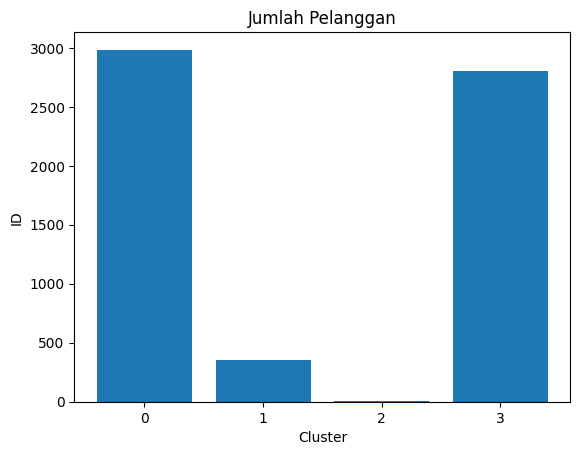

In [ ]:
# Membuat grafik batang
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('ID')
plt.title('Jumlah Pelanggan')
plt.xticks(cluster_counts.index)
plt.show()